# Laborator 3. Regresia Liniara in Python utilizand Pandas si Scikit-Learn


## Cuprins

1. Selectarea setului de date si .
2. Importarea bibliotecilor si setului de date.
3. Studierea setului de date.
4. Setarea problemei si Pregatirea setului de date pentru antrenare.<br>
   a. Divizare in set de date pentru antrenare si set de date pentru testare. <br>
   b. Utilizarea k-folds cross validation pentru testare.
5. Initializarea modelului de regresie liniara si aplicarea acestuia pe datele noastre.
6. Concluzii.

## Selectarea setului de date
1. Setul de date il veti alege de sine stator din urmatoarele repositorii (important este ca setul de date sa fie compatibil cu rezolvarea problemei de regresie liniara):<br>
   a. https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=&sort=taskDown&view=table <br>
   b. https://www.kaggle.com/rtatman/datasets-for-regression-analysis <br>
   c. https://data.world/datasets/regression <br>
   d. https://www.kdnuggets.com/datasets/index.html
2. Creati un fisier de tip jupyter notebook in aceeasi mapa.

### Cei care nu-si gasesc nimic potrivit pot folosi acelasi dataset folosit anterior (lab. 2).
### Exemplul va fi pe datasetul utilizat in lab. 2.
   

## Importarea bibliotecilor si setului de date

In [182]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

incarcam fisierul .csv intr-un dataframe |
daca la voi nu e csv, incercati mai intai sa-l transformati in csv


In [3]:
data = pd.read_csv('imbd_superhero.csv', header=None)
# nu avem setate numele de coloane | 
# in lab 2 le-am setat direct in fctia read_csv | 
# insa le putem seta si dupa incarcarea fisierului
data.columns = ['An', 'Titlu','Organizatia', 'IMBD', 'AltRating', 'DataX', 'UnkColumn', 'PretMediulaBilet', 'NrDeSpectatori', 'TopPentruAncutare']


## Studierea setului de date prin manipularea acestuia

Hai sa vizualizam datele, grafic

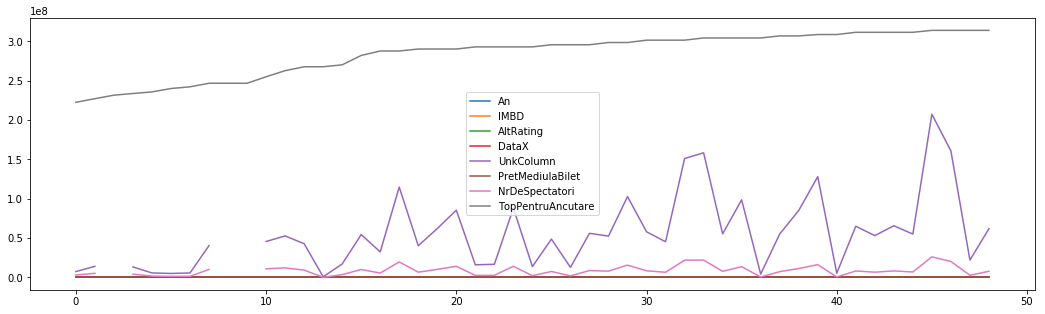

In [4]:
data.plot(figsize=(18, 5)) # figsize este marimea dreptunghiului unde este afisat graficul (latimea si lungimea)

Daca privim mai atent datele putem observa niste lucruri stranii in grafic
1. Se pare ca anumite date lipsesc (acolo unde este sters graficul)
2. Se pare ca avem anomalii in date. (anumite date nu coincid cu valorile de min sau max care le poate lua o coloana)

Pentru a verifica daca nu lipsesc unele valori in setul nostru de date folosim fctia isnull()


In [5]:
data.isnull().values.any()

True

Functia a returnat <b> True </b> ceea ce inseamna ca trebuie sa analiam si sa vedem ce date lipsesc

In [6]:
# afisarea tabelara primelor date din tabel
data.head()

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnkColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,235824902


Observam anumite date cu valoarea <b>NaN</b> (Not a Number) in coloanele <i>UnkColumn</i> si <i>NrDeSpectatori</i> care, probabil, ne pun piedica. <br>
O metoda ar fi sa scapam de aceste valori prin a sterge randurile unde ele apar.<br>
Putem aceste randuri utilizand functia dropna(). <br>
Functia dropna() sterge randul unde cel putin un element lipseste sau este diferit de valoare coloanei.<br>
Functia folosita pe coloane, ex. dropna(axis='column'), sterge coloana unde cel putin un element lispste.

In [10]:
## data fara randuri cu erori
data_fara_lipse = data.dropna()
data_fara_lipse.tail()

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnkColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
44,2011,X-Men: First Class,Marvel,7.9,87,83.0,55101604.0,7.93,6.948500e+06,311591917
45,2012,Marvel's The Avengers,Marvel,8.7,92,89.5,207438708.0,7.92,2.619176e+07,314055984
46,2012,The Dark Knight Rises,DC,9.1,86,88.5,160887295.0,7.92,2.031405e+07,314055984
47,2012,Ghost Rider: Spirit of Vengeance,Marvel,4.5,17,31.0,22115334.0,7.92,2.792340e+06,314055984
48,2012,The Amazing Spider-Man,Marvel,7.6,74,75.0,62004688.0,7.92,7.828875e+06,314055984


## Anomalii in anumite coloane (Muntii din grafic)

Anomaliile din date sunt niste valori extreme ale unor caracteristici. <br>
Valorile extreme, de obicei, apar in rezulatatul unui experiment eronat, sau chiar poate fi o valoare corecta.
Cel mai bine este sa le stergem.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B73DFD0>,
      dtype=object)

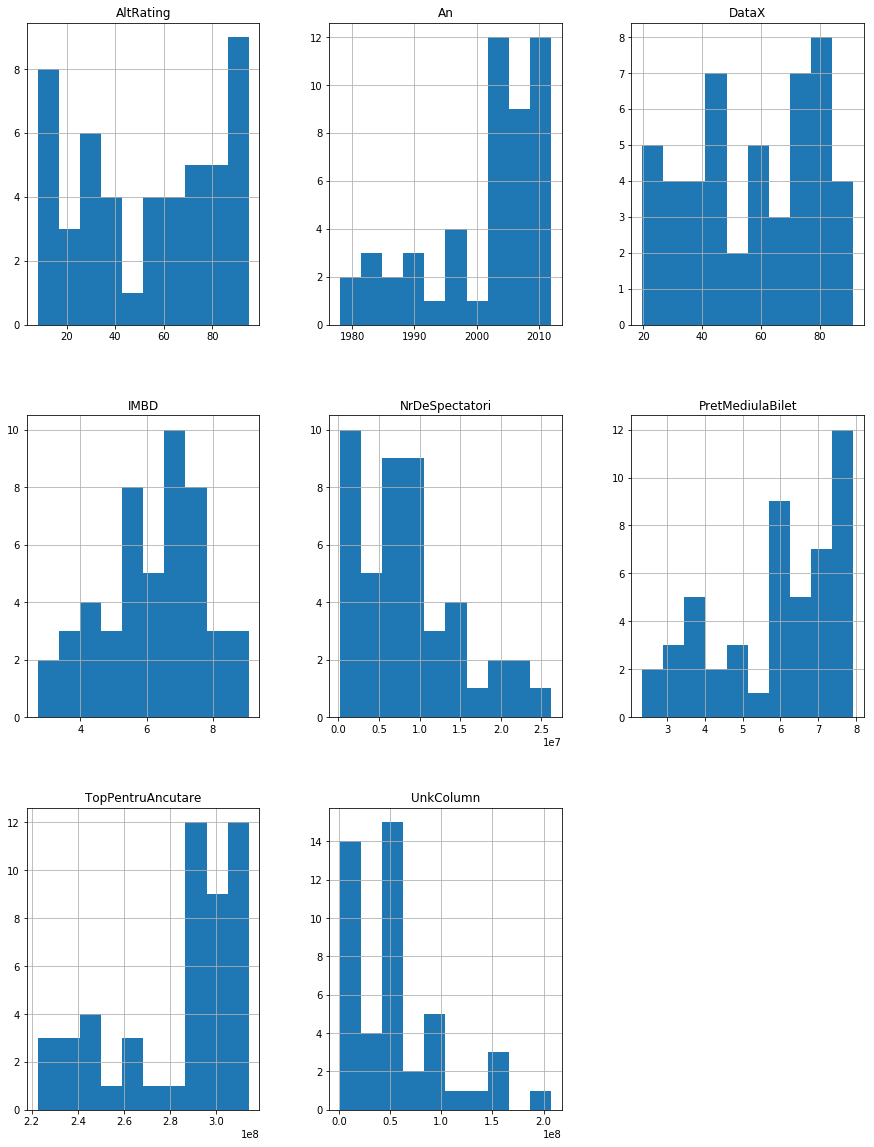

In [9]:
data.hist(figsize = (15,20))

## Definirea problemei de regresie


Presupunem ca vrem la anul sa mergem la un film de la DC si vrem sa cunoastem care va fi pretul mediu la bilet.

Drept urmare, din datele noastre putem lua ca si o caracteristica din observarile anterioare pentru variabila independenta x - coloana "An", iar drept raspuns variabila dependenta y - coloana "PretMediulaBilet"

In [170]:
dc = data[data['Organizatia'] == 'DC']
XY = dc[['An', 'PretMediulaBilet']]
# caracteristica an - variabila independenta x
X = dc['An']
# raspunsul Pretul mediu la bilet - variabila dependenda y
Y = dc['PretMediulaBilet']
X.count() == Y.count() ## daca true, avem acelasi numar de observatii
print("Numarul de observatii este ")
n = X.count()
print(n) ## 20 de observatii
print("Incepand cu ")
print(X.iloc[0]) ## iloc - indexul
print("pana in")
print(X.iloc[n-1])

Numarul de observatii este 
20
Incepand cu 
1978
pana in
2012


functia .iloc [] este bazata in principal pe pozitia intreaga (de la 0 la lungimea-1 a coloanei).


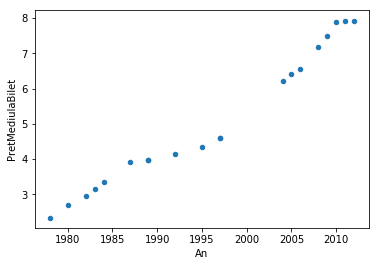

In [176]:
XY.plot.scatter(y = 'PretMediulaBilet', x = 'An')

In [179]:
XY.corr()
# XY.descibe()

,An,PretMediulaBilet
An,1.000000,0.983996
PretMediulaBilet,0.983996,1.000000


In [193]:

model = LinearRegression()

In [195]:
scores = []
kfold = KFold(n_splits = 3, shuffle = True, random_state=42)b

In [210]:
X = dc.as_matrix(['An'])
Y = dc.as_matrix(['PretMediulaBilet'])

C:\Users\Dorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Dorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[1978],
       [1980],
       [1982],
       [1983],
       [1984],
       [1987],
       [1989],
       [1989],
       [1992],
       [1995],
       [1997],
       [1997],
       [2004],
       [2005],
       [2006],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

In [218]:
pretMediuBilet_model = model.fit(X,Y)
pretMediuBilet_model.predict(np.array([[2021]]))

0.968248454102724

In [221]:
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, Y)):
     scores.append(model.score(X, Y))
print(scores)

[0.968248454102724, 0.968248454102724, 0.968248454102724]
